In [185]:
import pandas as pd
import os

In [ ]:
# Task 1: Merge 12 months of data into single csv file

In [186]:
files=[file for file in os.listdir("./Sales_Data")]
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data, df])

all_months_data.to_csv("./all_data.csv",index=False)

In [187]:
all_data=pd.read_csv("./all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/2022 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2022 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/2022 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
#Drop all rows of NAN

In [188]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data=all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/2022 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2022 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/2022 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
#Find Or and delete it

In [190]:
all_data=all_data[all_data["Order Date"].str[0:2]!='Or']

In [ ]:
# Task 2 : Adding the month column

In [191]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/2022 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2022 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/2022 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
# Convert Quantity ordered and price each to their respective datatypes

In [192]:
all_data["Quantity Ordered"]= pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]= pd.to_numeric(all_data["Price Each"])

In [ ]:
# Task 3 : Add sales column

In [193]:
all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/2022 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2022 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/2022 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
# Task 4 : Add City Column

In [194]:
# We use .apply() method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x) + "("+ get_state(x) + ")" )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/2022 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2022 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,04/12/2022 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,04/30/2022 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [ ]:
# Question 1: What is the best month for sales? How much was earned that month?

In [195]:
results = all_data.groupby("Month").sum("Sales")
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


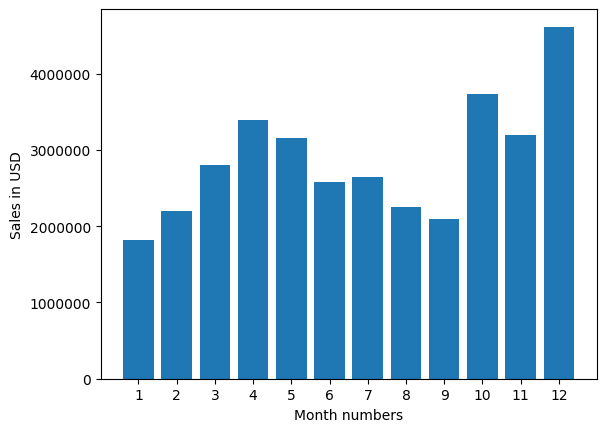

In [196]:
import matplotlib.pyplot as plt

months= range(1,13)
plt.xticks(months)
plt.xlabel("Month numbers")
plt.ylabel("Sales in USD")
plt.bar(months,results["Sales"])
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.show()

In [ ]:
# Question 2: Which city has highest number of sales?

In [197]:
results = all_data.groupby("City").sum("Sales")
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta(GA),16602,2779908.20,104794,2795498.58
Austin(TX),11153,1809873.61,69829,1819581.75
Boston(MA),22528,3637409.77,141112,3661642.01
Dallas(TX),16730,2752627.82,104620,2767975.40
Los Angeles(CA),33289,5421435.23,208325,5452570.80
New York City(NY),27932,4635370.83,175741,4664317.43
Portland(ME),2750,447189.25,17144,449758.27
Portland(OR),11303,1860558.22,70621,1870732.34
San Francisco(CA),50239,8211461.74,315520,8262203.91


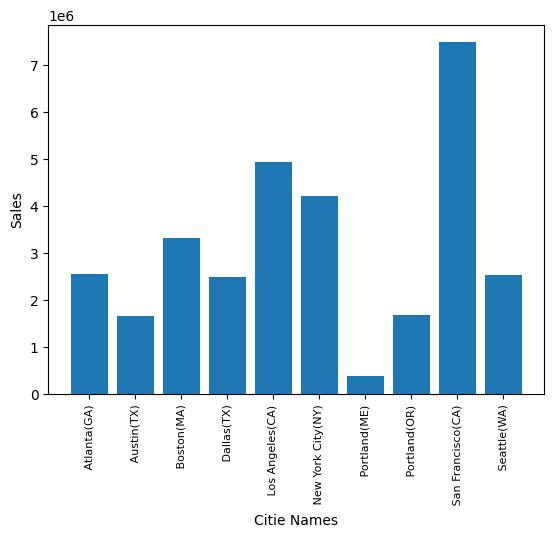

In [181]:
import matplotlib.pyplot as plt

cities = [city for city,df in all_data.groupby("City") ]

plt.bar(cities, results["Sales"])
plt.xticks(cities , rotation="vertical" , size=8)
plt.xlabel("Citie Names")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Question 3: What time should we display advertisements to maximize the likelihood of customer buying product

In [201]:
all_data["Order Date"]= pd.to_datetime(all_data["Order Date"])

all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2022-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2022-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
2,176560,Google Phone,1,600.00,2022-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2022-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
4,176561,Wired Headphones,1,11.99,2022-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


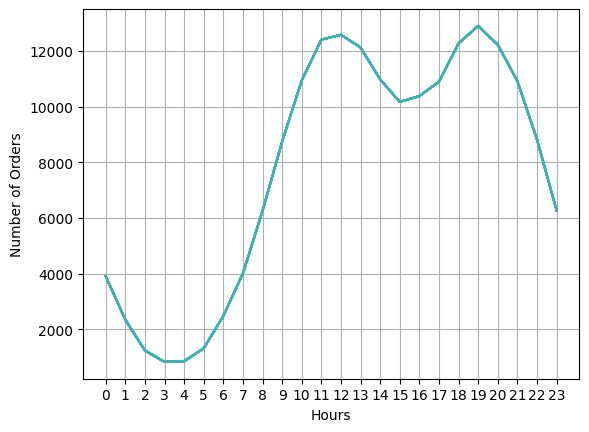

In [205]:
hours= [hour for hour,df in all_data.groupby("Hour") ]

plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

In [ ]:
#My recommendation is around 11am(11) and 7pm(19)

In [ ]:
# Question 4: What products are most often sold together?

In [212]:
df= all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ',' .join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4564\2212274918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ',' .join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
# import libraries

In [215]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df["Grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
# Question 5: What product was sold the most? Why do you think it sold the most?


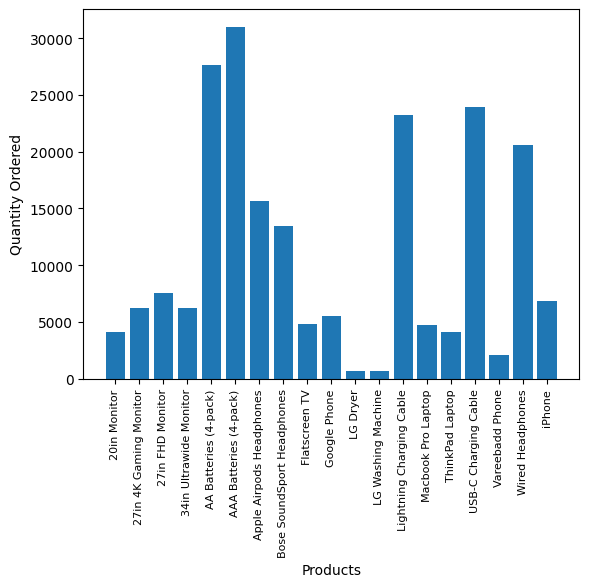

In [233]:
product_group=all_data.groupby("Product")
quantity_ordered= product_group.sum("Quantity Ordered")["Quantity Ordered"]

products = [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation="vertical" , size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Products")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4564\3012418511.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\HP\AppData\Local\Temp\ipykernel_4564\3012418511.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


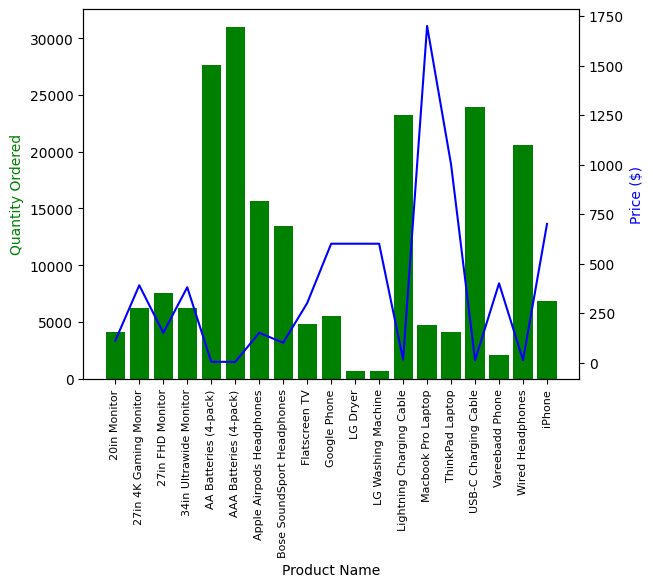

In [237]:
prices= all_data.groupby("Product").mean("Price Each")["Price Each"]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()